Noise Complaints reported in New York City during different months in 2024.

In [29]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
header = ["Unique Key","Created Date","Closed Date","Agency","Agency Name","Complaint Type","Descriptor","Location Type","Incident Zip","Incident Address","Street Name","Cross Street 1","Cross Street 2","Intersection Street 1","Intersection Street 2","Address Type","City","Landmark","Facility Type","Status","Due Date","Resolution Description","Resolution Action Updated Date","Community Board","BBL","Borough","X Coordinate (State Plane)","Y Coordinate (State Plane)","Open Data Channel Type","Park Facility Name","Park Borough","Vehicle Type","Taxi Company Borough","Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction","Road Ramp","Bridge Highway Segment","Latitude","Longitude","Location"]
df = pandas.read_csv("../data/nyc_311_2024_noice.csv", names=header)
df["Resolution Description"]

0         The Police Department responded to the complai...
1         The Police Department responded to the complai...
2         The Police Department responded to the complai...
3         The Police Department responded to the complai...
4         The Police Department responded to the complai...
                                ...                        
753258    The Police Department responded to the complai...
753259    The Police Department responded to the complai...
753260    The Police Department responded to the complai...
753261    The Police Department responded to the complai...
753262    The Police Department responded to the complai...
Name: Resolution Description, Length: 753263, dtype: object

In [31]:
df["Complaint Type"].unique()

array(['Noise - Residential', 'Noise - Street/Sidewalk',
       'Noise - House of Worship', 'Noise', 'Noise - Commercial',
       'Noise - Park', 'Noise - Vehicle', 'Noise - Helicopter'],
      dtype=object)

In [32]:
complaint_counts = df["Complaint Type"].value_counts()
complaint_counts
#notice that the last ones are ot very significant 

Complaint Type
Noise - Residential         379297
Noise - Street/Sidewalk     163002
Noise - Commercial           68347
Noise                        55522
Noise - Vehicle              48834
Noise - Helicopter           28686
Noise - Park                  8279
Noise - House of Worship      1296
Name: count, dtype: int64

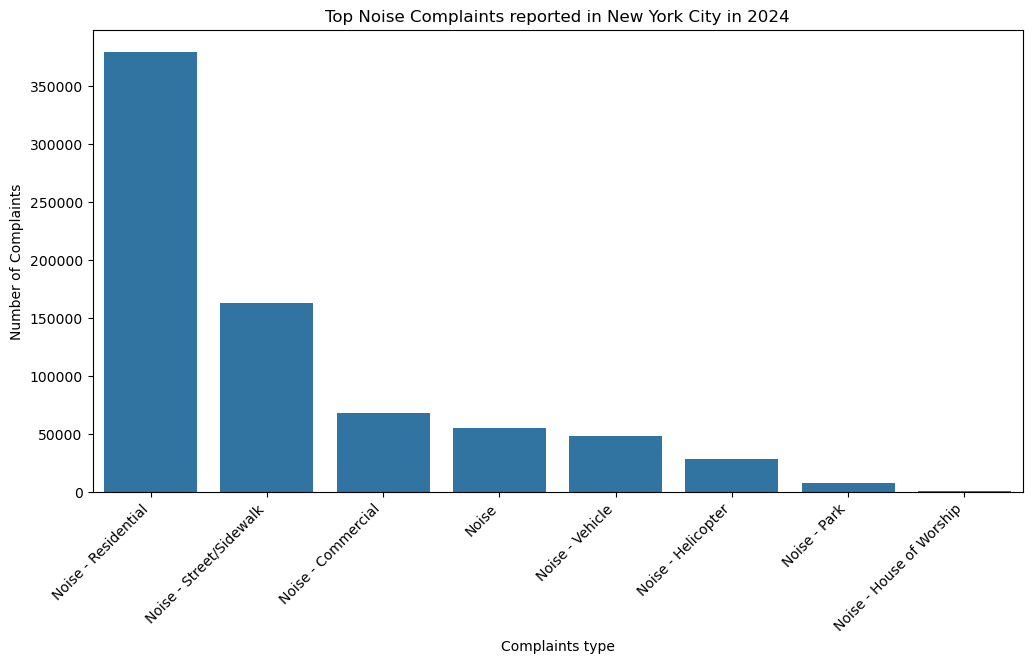

In [33]:
plt.figure(figsize=(12,6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)
plt.title("Top Noise Complaints reported in New York City in 2024")
plt.xlabel("Complaints type")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
filter = df[df["Complaint Type"].isin(["Noise - Residential","Noise - Street/Sidewalk", "Noise - Commercial"]) ]
filter["Descriptor"].unique()

left_out = df[~df["Complaint Type"].isin(["Noise - Residential","Noise - Street/Sidewalk", "Noise - Commercial"])]
print(len(left_out))



142617


In [40]:
complaint_counts = filter["Descriptor"].value_counts()
complaint_counts

Descriptor
Loud Music/Party                  416409
Banging/Pounding                  119758
Loud Talking                       67048
Loud Television                     6173
Car/Truck Music                      733
Car/Truck Horn                       516
Partial Access                         3
In Public                              2
Use Outside                            1
Other (complaint details)              1
Double Parked Blocking Vehicle         1
No Access                              1
Name: count, dtype: int64

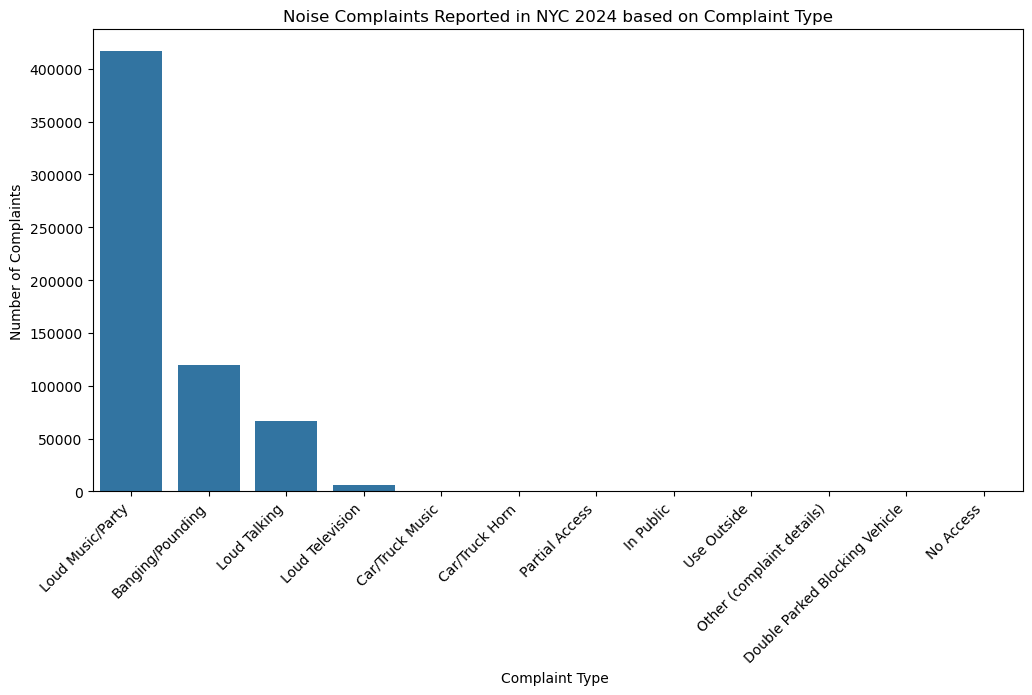

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=complaint_counts.index, y=complaint_counts.values)
plt.title("Noise Complaints Reported in NYC 2024 based on Complaint Type")
plt.xlabel("Complaint Type ")
plt.ylabel("Number of Complaints")
plt.xticks(rotation=45, ha="right")
plt.show()

/tmp/ipykernel_1842/587814063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter["Created Date"] = pandas.to_datetime(filter["Created Date"])
/tmp/ipykernel_1842/587814063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter["Month"] = filter["Created Date"].dt.month


<Figure size 1600x800 with 0 Axes>

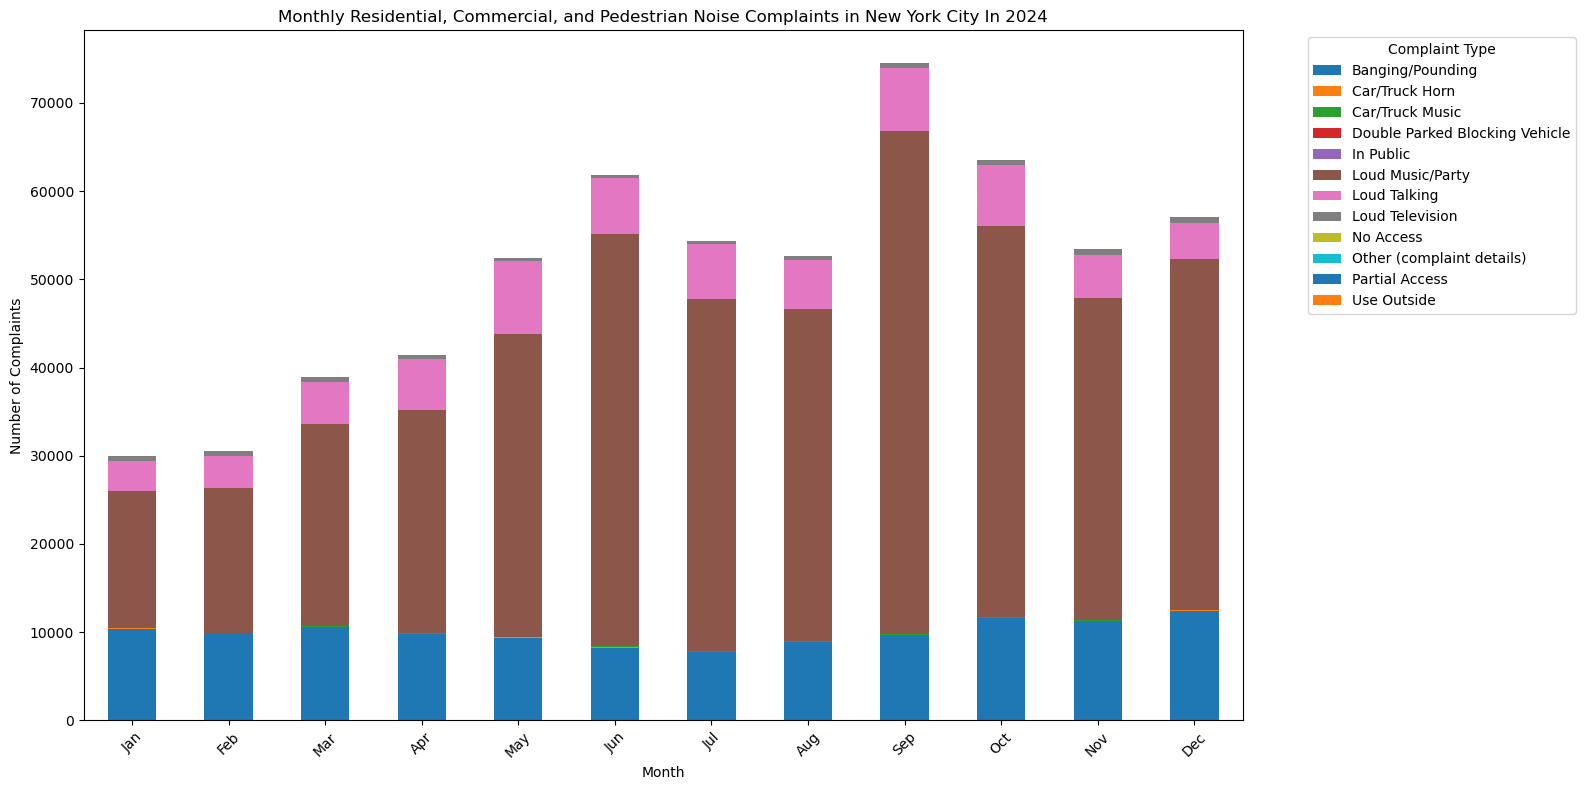

In [45]:
filter["Created Date"] = pandas.to_datetime(filter["Created Date"])
filter["Month"] = filter["Created Date"].dt.month

monthly_complaints = filter.groupby(['Month', 'Descriptor']).size().unstack(fill_value=0)

plt.figure(figsize=(16,8))
monthly_complaints.plot(kind='bar', stacked=True, figsize=(16, 8))
plt.title("Monthly Residential, Commercial, and Pedestrian Noise Complaints in New York City In 2024")
plt.xlabel("Month")
plt.ylabel("Number of Complaints")
plt.xticks(rotation = 45)
plt.xticks(ticks=range(0,12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Complaint Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [46]:
df["Resolution Description"].unique()


array(['The Police Department responded to the complaint and determined that police action was not necessary.',
       'The Police Department responded to the complaint and with the information available observed no evidence of the violation at that time.',
       'The Police Department responded to the complaint and took action to fix the condition.',
       'The Police Department responded to the complaint but officers were unable to gain entry into the premises.',
       "The Department of Environmental Protection closed or canceled this complaint at the complainant's request.",
       'The Police Department responded and upon arrival those responsible for the condition were gone.',
       "This complaint does not fall under the Police Department's jurisdiction.",
       'The Department of Environmental Protection researched this complaint and determined that it could be closed.',
       "The Department of Environmental Protection (DEP) didn't observe a violation of the NYC Air or N

In [47]:
df["Status"].unique()

array(['Closed', 'Unspecified', 'In Progress', 'Open', 'Assigned',
       'Started'], dtype=object)